## 作業 (Python 基礎)

1. 請使用 pip 將 jieba 安裝在自己的電腦上
2. 閱讀jieba 相關的文件，了解jieba 的用法
3. 請將蔡英文演說文 (https://raw.githubusercontent.com/ywchiu/tibamedl/master/Data/speech_tsai.txt) 下載存入到自己電腦
4. 請使用python 的檔案操作方法讀取新聞
5. 請使用 jieba 將演說文切詞
6. 請統計該演說文最常出現的十大字詞

In [1]:
! pip install jieba

In [1]:
import jieba

jieba.enable_paddle()# 启动paddle模式。 0.40版之后开始支持，早期版本不支持
strs=["我来到北京清华大学","乒乓球拍卖完了","中国科学技术大学"]
for str in strs:
    seg_list = jieba.cut(str,use_paddle=True) # 使用paddle模式
    print("Paddle Mode: " + '/'.join(list(seg_list)))

Paddle enabled successfully......


Paddle Mode: 我/来到/北京清华大学
Paddle Mode: 乒乓球/拍卖/完/了
Paddle Mode: 中国科学技术大学


In [3]:
import jieba

strs=["我来到北京清华大学","乒乓球拍卖完了","中国科学技术大学"]
for str in strs:
    seg_list = jieba.cut(str,use_paddle=False) 
    print('/'.join(list(seg_list)))

我/来到/北京/清华大学
乒乓球/拍卖/完/了
中国/科学技术/大学


In [4]:
! wget https://raw.githubusercontent.com/ywchiu/tibamedl/master/Data/speech_tsai.txt

--2020-07-18 01:43:57--  https://raw.githubusercontent.com/ywchiu/tibamedl/master/Data/speech_tsai.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 6579 (6.4K) [text/plain]
Saving to: ‘speech_tsai.txt’

speech_tsai.txt     100%[===================>]   6.42K  --.-KB/s    in 0s      

2020-07-18 01:43:57 (50.5 MB/s) - ‘speech_tsai.txt’ saved [6579/6579]



In [5]:
! head speech_tsai.txt

大會主席蘇嘉全院長、現場各位貴賓、電視機前和網路上的全體國人同胞，大家早安，大家好。

今天，是中華民國一百零八年的國慶日，謝謝來自世界各地的好朋友，跟我們共度這個值得紀念的日子。

去年，也是在國慶日，我和大家說，台灣正處在變局當中。世界貿易局勢的變動、國際政治情勢的變化，都讓未來充滿挑戰。我們必須「求穩、應變、進步」，厚植實力、壯大台灣。

轉眼又過了一年，世界依然快速變化，甚至更加劇烈。美中貿易戰的持續進行；距離我們不遠的香港，因為「一國兩制」的失敗，正處於失序邊緣。

儘管如此，中國依然以「一國兩制台灣方案」，不斷威脅我們，並採取各種文攻武嚇，強烈挑戰了區域的穩定及和平。



In [6]:
import jieba
with open('speech_tsai.txt') as f:
  speech = f.read()

In [10]:
words = []
for word in jieba.cut(speech):
  words.append(word)

### Method 1

In [16]:
dic = {}
for word in words:
  if len(word) >=2:
    if word not in dic:
      dic[word] = 1
    else:
      dic[word] = dic[word] + 1

In [17]:
swd = sorted(dic.items(), key = lambda e: e[1], reverse=True)
swd[0:10]

[('我們', 43),
 ('台灣', 19),
 ('挑戰', 12),
 ('人民', 9),
 ('經濟', 8),
 ('中華民國', 7),
 ('一次', 7),
 ('未來', 6),
 ('自由民主', 6),
 ('世界', 5)]

### Method 2

In [18]:
dic = {}
for word in words:
  if len(word) >=2:
    dic[word] = dic.get(word,0) + 1

In [19]:
swd = sorted(dic.items(), key = lambda e: e[1], reverse=True)
swd[0:10]

[('我們', 43),
 ('台灣', 19),
 ('挑戰', 12),
 ('人民', 9),
 ('經濟', 8),
 ('中華民國', 7),
 ('一次', 7),
 ('未來', 6),
 ('自由民主', 6),
 ('世界', 5)]

### Method 3

In [21]:
from collections import Counter
c = Counter([w for w in words if len(w) >=2])
c.most_common(10)

[('我們', 43),
 ('台灣', 19),
 ('挑戰', 12),
 ('人民', 9),
 ('經濟', 8),
 ('中華民國', 7),
 ('一次', 7),
 ('未來', 6),
 ('自由民主', 6),
 ('世界', 5)]

## 決策樹

In [22]:
from sklearn.datasets import load_iris

iris = load_iris()

In [23]:
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [25]:
a = [1,3,5,7,9]
b = [2,4,6,8,10]
a * b

TypeError: ignored

In [28]:
for i,j in zip(a, b):
  print(i * j)

2
12
30
56
90


In [30]:
ary = []
for i,j in zip(a, b):
  ary.append(i * j)
ary

[2, 12, 30, 56, 90]

In [31]:
import numpy as np
np.array(a)

array([1, 3, 5, 7, 9])

In [32]:
na = np.array(a)
nb = np.array(b)
na * nb

array([ 2, 12, 30, 56, 90])

In [33]:
iris.data.shape

(150, 4)

In [34]:
iris.data[0:3,:]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2]])

In [36]:
len(iris.target)

150

In [37]:
iris.target[0:3]

array([0, 0, 0])

In [40]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [42]:
from sklearn import tree
clf = tree.DecisionTreeClassifier()
clf.fit(iris.data, iris.target)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [43]:
predicted = clf.predict(iris.data)

In [47]:
sum(predicted == iris.target) / len(iris.target)

1.0

In [48]:
from sklearn import tree
tree.export_graphviz(clf, out_file='tree.dot')

In [49]:
! cat tree.dot

digraph Tree {
node [shape=box] ;
0 [label="X[2] <= 2.45\ngini = 0.667\nsamples = 150\nvalue = [50, 50, 50]"] ;
1 [label="gini = 0.0\nsamples = 50\nvalue = [50, 0, 0]"] ;
0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;
2 [label="X[3] <= 1.75\ngini = 0.5\nsamples = 100\nvalue = [0, 50, 50]"] ;
0 -> 2 [labeldistance=2.5, labelangle=-45, headlabel="False"] ;
3 [label="X[2] <= 4.95\ngini = 0.168\nsamples = 54\nvalue = [0, 49, 5]"] ;
2 -> 3 ;
4 [label="X[3] <= 1.65\ngini = 0.041\nsamples = 48\nvalue = [0, 47, 1]"] ;
3 -> 4 ;
5 [label="gini = 0.0\nsamples = 47\nvalue = [0, 47, 0]"] ;
4 -> 5 ;
6 [label="gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]"] ;
4 -> 6 ;
7 [label="X[3] <= 1.55\ngini = 0.444\nsamples = 6\nvalue = [0, 2, 4]"] ;
3 -> 7 ;
8 [label="gini = 0.0\nsamples = 3\nvalue = [0, 0, 3]"] ;
7 -> 8 ;
9 [label="X[0] <= 6.95\ngini = 0.444\nsamples = 3\nvalue = [0, 2, 1]"] ;
7 -> 9 ;
10 [label="gini = 0.0\nsamples = 2\nvalue = [0, 2, 0]"] ;
9 -> 10 ;
11 [label="gini = 0.0\nsampl

In [53]:
from sklearn import tree
clf = tree.DecisionTreeClassifier(max_depth = 2, random_state = 42)
clf.fit(iris.data, iris.target)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=2, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

In [54]:
from sklearn import tree
tree.export_graphviz(clf, out_file='tree.dot')

In [55]:
! cat tree.dot

digraph Tree {
node [shape=box] ;
0 [label="X[2] <= 2.45\ngini = 0.667\nsamples = 150\nvalue = [50, 50, 50]"] ;
1 [label="gini = 0.0\nsamples = 50\nvalue = [50, 0, 0]"] ;
0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;
2 [label="X[3] <= 1.75\ngini = 0.5\nsamples = 100\nvalue = [0, 50, 50]"] ;
0 -> 2 [labeldistance=2.5, labelangle=-45, headlabel="False"] ;
3 [label="gini = 0.168\nsamples = 54\nvalue = [0, 49, 5]"] ;
2 -> 3 ;
4 [label="gini = 0.043\nsamples = 46\nvalue = [0, 1, 45]"] ;
2 -> 4 ;
}

In [56]:
predicted = clf.predict(iris.data)

In [58]:
sum(predicted == iris.target) / len(iris.target)

0.96

In [59]:
X = iris.data[:, [2, 3]]
y = iris.target
clf = tree.DecisionTreeClassifier(max_depth=2, random_state = 42)
clf.fit(X, y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=2, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

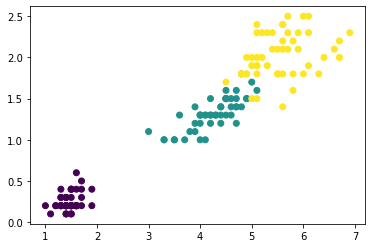

In [60]:
from matplotlib import pyplot as plt
plt.scatter(X[:,0],X[:,1], c = iris.target)

In [63]:
clf.predict(np.array([[1,0.25]]))

array([0])

In [68]:
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
x_min, x_max,y_min, y_max

(0.0, 7.9, -0.9, 3.5)

In [65]:
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))

In [67]:
xx.shape

(44, 79)

In [69]:
np.c_[xx.ravel(), yy.ravel()]

array([[ 0. , -0.9],
       [ 0.1, -0.9],
       [ 0.2, -0.9],
       ...,
       [ 7.6,  3.4],
       [ 7.7,  3.4],
       [ 7.8,  3.4]])

In [70]:
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

In [71]:
Z

array([0, 0, 0, ..., 2, 2, 2])

In [73]:
Z = Z.reshape(xx.shape)
Z

array([[0, 0, 0, ..., 1, 1, 1],
       [0, 0, 0, ..., 1, 1, 1],
       [0, 0, 0, ..., 1, 1, 1],
       ...,
       [0, 0, 0, ..., 2, 2, 2],
       [0, 0, 0, ..., 2, 2, 2],
       [0, 0, 0, ..., 2, 2, 2]])

Text(0, 0.5, 'Petal.Width')

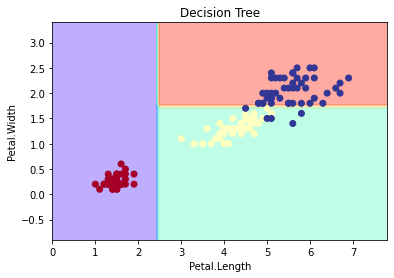

In [75]:
plt.contourf(xx, yy, Z, alpha=0.4, cmap = plt.cm.rainbow)
plt.scatter(X[:, 0], X[:, 1], c=y, alpha=1, cmap = plt.cm.RdYlBu)
plt.title('Decision Tree')
plt.xlabel('Petal.Length')
plt.ylabel('Petal.Width')

## 迴歸模型

In [161]:
from sklearn.linear_model import LogisticRegression

In [162]:
clf = LogisticRegression(max_iter= 1000)
clf.fit(iris.data, iris.target)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [163]:
predicted = clf.predict(iris.data)

In [164]:
predicted

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [165]:
predicted2 = clf.predict_proba(iris.data)

In [167]:
predicted2[0:3,:]

array([[9.81583143e-01, 1.84168427e-02, 1.45011486e-08],
       [9.71339457e-01, 2.86605127e-02, 3.01872659e-08],
       [9.85274653e-01, 1.47253344e-02, 1.23396963e-08]])

In [84]:
sum(predicted == iris.target) / len(iris.target)

0.9733333333333334

In [85]:
X = iris.data[:, [2, 3]]
y = iris.target
clf = LogisticRegression()
clf.fit(X, y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

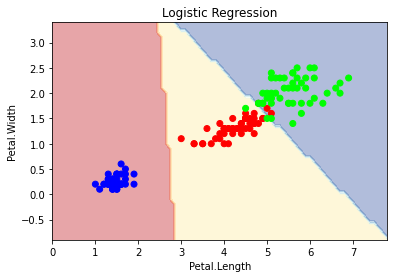

150

In [86]:
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
np.arange(y_min, y_max, 0.1))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.plot()
plt.contourf(xx, yy, Z, alpha=0.4, cmap = plt.cm.RdYlBu)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap = plt.cm.brg)
plt.title('Logistic Regression')
plt.xlabel('Petal.Length')
plt.ylabel('Petal.Width')
plt.show()

## Numpy

In [87]:
import numpy as np
na = np.array([1,2,3,4,5])

In [88]:
na

array([1, 2, 3, 4, 5])

In [89]:
na.append

AttributeError: ignored

In [91]:
np.array([1,2,3,4,5, 'qoo'])

array(['1', '2', '3', '4', '5', 'qoo'], dtype='<U21')

## Numpy v.s. List
- Numpy: 必須所有資料都同一類型
- Numpy: 不得增減裡面的物件數量

In [92]:
na

array([1, 2, 3, 4, 5])

In [93]:
na[0]

1

In [94]:
na[1:3]

array([2, 3])

In [95]:
na > 3

array([False, False, False,  True,  True])

In [96]:
na[na > 3]

array([4, 5])

In [97]:
na = np.array([[1, 2, 3, 4, 5],[6, 7, 8, 9, 10]])

In [98]:
na

array([[ 1,  2,  3,  4,  5],
       [ 6,  7,  8,  9, 10]])

In [99]:
na.shape

(2, 5)

In [100]:
na[0,0]

1

In [101]:
na[0,:]

array([1, 2, 3, 4, 5])

In [112]:
na[:,0]

array([1, 6])

In [103]:
na.T

array([[ 1,  6],
       [ 2,  7],
       [ 3,  8],
       [ 4,  9],
       [ 5, 10]])

In [104]:
na

array([[ 1,  2,  3,  4,  5],
       [ 6,  7,  8,  9, 10]])

In [105]:
na.reshape(5,2)

array([[ 1,  2],
       [ 3,  4],
       [ 5,  6],
       [ 7,  8],
       [ 9, 10]])

In [106]:
x = np.array([20,3,100,10])

In [107]:
x.shape

(4,)

In [110]:
w = np.random.randn(4,5)

In [111]:
np.dot(x,w)

array([ -43.60132607,  122.12712989,  112.6195485 , -128.73337904,
        -57.30324349])

## 激活函數

In [113]:
x = np.array([-1,1,2])

In [114]:
x > 0

array([False,  True,  True])

In [115]:
(x > 0).astype(int)

array([0, 1, 1])

In [116]:
def threshold_function(x):
  return (x>0).astype(int)

In [117]:
a = np.array([-3,3,9])
threshold_function(a)

array([0, 1, 1])

In [118]:
np.exp(1)
#1 / (1 +np.exp(-x))

2.718281828459045

In [119]:
def sigmoid_function(x):
  return 1 / (1 +np.exp(-x))

In [120]:
a = np.array([-1,1,2])

In [121]:
sigmoid_function(a)

array([0.26894142, 0.73105858, 0.88079708])

In [122]:
a = np.array([-1,100,200])

In [123]:
sigmoid_function(a)

array([0.26894142, 1.        , 1.        ])

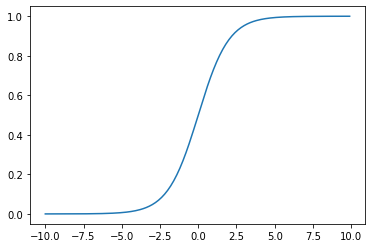

In [128]:
from matplotlib import pyplot as plt
x = np.arange(-10,10,0.1)
y = sigmoid_function(x)
plt.plot(x,y)

In [125]:
def tangent_function(x):
  return (1 - np.exp(-2*x)) / (1 +np.exp(-2*x))

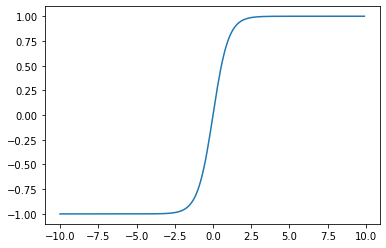

In [129]:
x = np.arange(-10,10,0.1)
y = tangent_function(x)
plt.plot(x,y)

In [130]:
x = np.array([-1,1,2])
tangent_function(x)

array([-0.76159416,  0.76159416,  0.96402758])

In [131]:
np.tanh(x)

array([-0.76159416,  0.76159416,  0.96402758])

In [138]:
a = np.array([-1,1,3])
sigmoid_function(a)

array([0.26894142, 0.73105858, 0.95257413])

In [139]:
tangent_function(a)

array([-0.76159416,  0.76159416,  0.99505475])

In [140]:
def relu_function(x):
  return np.maximum(0,x)

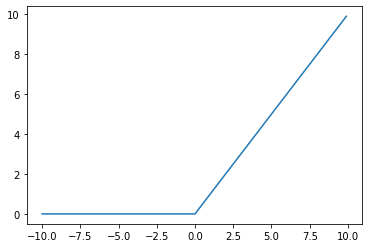

In [141]:
x = np.arange(-10,10,0.1)
y = relu_function(x)
plt.plot(x,y)

In [142]:
X = np.array([1,2])
W = np.array([[1,3,5],[2,4,6]])

In [143]:
X.shape

(2,)

In [144]:
W.shape

(2, 3)

In [146]:
O1 = np.dot(X,W)

In [147]:
W2 = np.array([[1,2],[3,4],[5,6]])
np.dot(O1, W2)

array([123, 156])

In [148]:
network = {}
network['w1'] = np.array([[0.1,0.3,0.5],[0.2,0.4,0.6]])
network['b1'] = np.array([0.1,0.2,0.3])
network['w2'] = np.array([[0.1,0.4],[0.2,0.5],[0.3,0.6]])
network['b2'] = np.array([0.1,0.2])

In [149]:
network

{'b1': array([0.1, 0.2, 0.3]),
 'b2': array([0.1, 0.2]),
 'w1': array([[0.1, 0.3, 0.5],
        [0.2, 0.4, 0.6]]),
 'w2': array([[0.1, 0.4],
        [0.2, 0.5],
        [0.3, 0.6]])}

In [150]:
x = np.array([1,0.5])

In [151]:
x.shape

(2,)

In [155]:
a = np.dot(x, network['w1']) + network['b1']

In [158]:
z = sigmoid_function(a)

In [160]:
y = np.dot(z, network['w2']) + network['b2']


array([0.51615984, 1.21402696])

In [168]:
def softmax_function(x):
  return np.exp(x) / np.sum(np.exp(x))

In [169]:
softmax_function(y)

array([0.33228528, 0.66771472])

In [170]:
def mean_squared_err(y_hat, y):
  return 0.5 * np.sum((y_hat - y) ** 2)


In [ ]:
def cross_entropy_err(y_hat, y):
  delta = 1e-8
  return -np.sum(y*np.log(y_hat + delta))

In [171]:
np.log(0)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log
  """Entry point for launching an IPython kernel.


-inf

In [172]:
np.log(0 + 1e-8)

-18.420680743952367

In [173]:
def func(x):
  return x ** 2

In [180]:
x = np.arange(-5,5,0.1)

In [181]:
y = func(x)

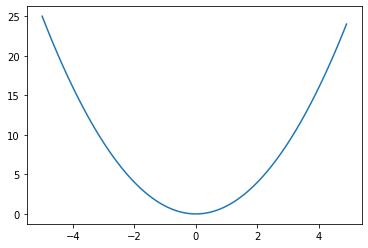

In [182]:
plt.plot(x,y)

In [183]:
def dfunc(f, x):
  h = 1e-4
  return (f(x+h) - f(x)) / (h)

In [184]:
dfunc(func, 3)

6.000100000012054

In [185]:
def dfunc2(f, x):
  h = 1e-40
  return (f(x+h) - f(x)) / (h)

In [186]:
dfunc2(func, 3)

0.0

In [187]:
# 切線函數
def tfunc(f, x, t):
  d = dfunc(f, x)
  y = f(x) - d*x
  return d*t + y

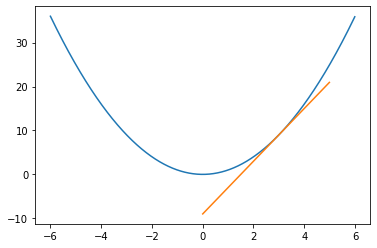

In [189]:
# 繪製x ^ 2
x = np.arange(-6, 6, 0.01)
y = func(x)
plt.plot(x, y)

# 繪製x = 3 時的切線
x2 = np.arange(0, 5, 0.01)
y2 = tfunc(func, 3, x2)
plt.plot(x2, y2)

In [190]:
def dfunc(f, x):
  h = 1e-4
  return (f(x+h) - f(x-h)) / (2*h)

In [191]:
dfunc(func, 3)

6.000000000012662

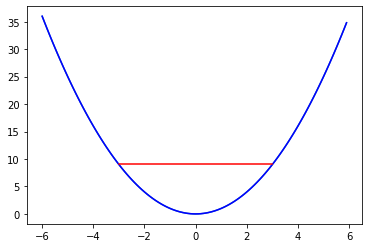

In [195]:
x = np.arange(-6,6,0.1)
y = func(x)
plt.plot(x,y)

p = 3
ary = [p]
newp = p - dfunc(func, 3)
ary.append(newp)
plt.plot(x,y, c='blue')
plt.plot(np.array(ary),func(np.array(ary)), c='red')

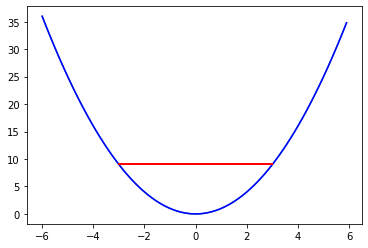

In [198]:
x = np.arange(-6,6,0.1)
y = func(x)
plt.plot(x,y)

p = 3
ary = [p]
for i in range(10):
  p = p - dfunc(func, p)
  ary.append(p)

plt.plot(x,y, c='blue')
plt.plot(np.array(ary),func(np.array(ary)), c='red')

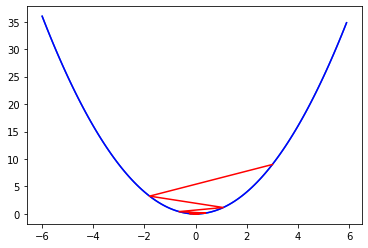

In [200]:
x = np.arange(-6,6,0.1)
y = func(x)
plt.plot(x,y)

p = 3
ary = [p]
for i in range(10):
  p = p - dfunc(func, p) * 0.8
  ary.append(p)

plt.plot(x,y, c='blue')
plt.plot(np.array(ary),func(np.array(ary)), c='red')

In [201]:
x = 3
g = 6

3 - 6 * 0.8

-1.8000000000000007

In [202]:
x = -1.8
g = -3.6
-1.8 - (-3.6 * 0.8)

1.0800000000000003

In [203]:
def gradient_descent(func, init_x, lr = 0.3, epochs = 100):
  x = init_x
  res = [x]
  for i in range(epochs):
    grad = dfunc(func,x)
    x = x - grad * lr
    res.append(x)
  return np.array(res)

In [204]:
x = gradient_descent(func, -5, lr=0.8)

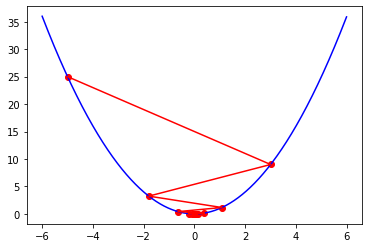

In [206]:
t = np.arange(-6.0, 6.0, 0.01)
plt.plot(t, func(t), c='b')
plt.plot(x, func(x), c='r')
plt.scatter(x, func(x), c='r')

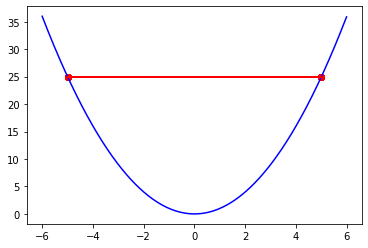

In [207]:
x = gradient_descent(func, -5, lr=1)
t = np.arange(-6.0, 6.0, 0.01)
plt.plot(t, func(t), c='b')
plt.plot(x, func(x), c='r')
plt.scatter(x, func(x), c='r')

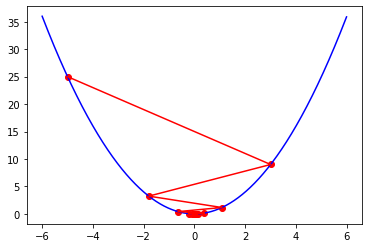

In [208]:
x = gradient_descent(func, -5, lr=0.8)
t = np.arange(-6.0, 6.0, 0.01)
plt.plot(t, func(t), c='b')
plt.plot(x, func(x), c='r')
plt.scatter(x, func(x), c='r')

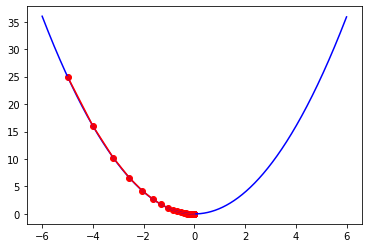

In [209]:
x = gradient_descent(func, -5, lr=0.1)
t = np.arange(-6.0, 6.0, 0.01)
plt.plot(t, func(t), c='b')
plt.plot(x, func(x), c='r')
plt.scatter(x, func(x), c='r')

In [216]:
#dir()

In [215]:
import gdown, os
file_id = "1efHsY16pxK0lBD2gYCgCTnv1Swstq771"
url = f"https://drive.google.com/uc?id={file_id}"
data_zip = os.path.join('/content/', "data.zip")
gdown.download(url, data_zip, quiet=False)
    

Downloading...
From: https://drive.google.com/uc?id=1efHsY16pxK0lBD2gYCgCTnv1Swstq771
To: /content/data.zip
1.88GB [00:20, 90.7MB/s]


'/content/data.zip'

In [224]:
np.random.seed(42)
np.random.randint(100)

51

In [230]:
def cross_entropy_err(y_hat, y):
  delta = 1e-8
  return -np.sum(y*np.log(y_hat + delta))

In [226]:
x = np.array([0.6, 0.9])
np.random.seed(42)
weight = np.random.randn(2,3)
z = np.dot(x, weight)

In [227]:
y_hat = softmax_function(z)

In [228]:
y_hat

array([0.73222998, 0.10288817, 0.16488185])

In [231]:
y = np.array([0, 0, 1])

In [232]:
cross_entropy_err(y_hat, y)

1.8025260716416405

In [233]:
def dfunc(f, x):
  h = 1e-4
  grad = np.zeros_like(x)
  it = np.nditer(x, flags=['multi_index'])
  while not it.finished:
    idx = it.multi_index
    tmp_val = x[idx]
    x[idx] = float(tmp_val) + h
    fxh1 = f(x) # f(x+h)
    x[idx] = tmp_val - h
    fxh2 = f(x) # f(x-h)
    grad[idx] = (fxh1 - fxh2) / (2*h)
    x[idx] = tmp_val
    it.iternext()
  return grad

In [238]:
weight

array([[ 0.49671415, -0.1382643 ,  0.64768854],
       [ 1.52302986, -0.23415337, -0.23413696]])

In [239]:
it = np.nditer(weight, flags=['multi_index'])
while not it.finished:
  idx = it.multi_index
  print(idx, weight[idx])
  it.iternext()

(0, 0) 0.4967141530112327
(0, 1) -0.13826430117118466
(0, 2) 0.6476885381006925
(1, 0) 1.5230298564080254
(1, 1) -0.23415337472333597
(1, 2) -0.23413695694918055


In [240]:
def predict(x):
  return np.dot(x, weight)

In [241]:
def loss(x, y):
  z = predict(x)
  y_hat = softmax_function(z)
  loss = cross_entropy_err(y_hat, y)
  return loss

In [242]:
func = lambda w: loss(x, y)

In [243]:
dfunc(func, weight)

array([[ 0.43933796,  0.0617329 , -0.50107086],
       [ 0.65900694,  0.09259935, -0.75160629]])

In [244]:
lr = 0.01 
weight - dfunc(func, weight) * lr

array([[ 0.49232077, -0.13888163,  0.65269925],
       [ 1.51643979, -0.23507937, -0.22662089]])

## 訓練神經網路

In [245]:
import numpy as np

In [246]:
def softmax_function(x):
    return np.exp(x) / np.sum(np.exp(x))

def sigmoid_function(x):
    return 1/ (1 + np.exp(-x))

def dfunc(f, x):
    h = 1e-4 
    grad = np.zeros_like(x)
    it = np.nditer(x, flags=['multi_index'])
    while not it.finished:     
        idx = it.multi_index
        tmp_val = x[idx]
        x[idx] = float(tmp_val) + h
        fxh1 = f(x) # f(x+h)
        x[idx] = tmp_val - h 
        fxh2 = f(x) # f(x-h)
        grad[idx] = (fxh1 - fxh2) / (2*h)
        x[idx] = tmp_val
        it.iternext()   
    return grad

def cross_entropy_err(y_hat, y):
    delta = 1e-8
    return -np.sum(y*np.log(y_hat + delta))

In [247]:
class ANN:
    def __init__(self, input_size, hidden_size, output_size, weight_init_std=0.01):
        self.params = {}
        self.params['W1'] = weight_init_std * np.random.randn(input_size, hidden_size)
        self.params['b1'] = np.zeros(hidden_size)
        self.params['W2'] = weight_init_std * np.random.randn(hidden_size, output_size)
        self.params['b2'] = np.zeros(output_size)
 
    def predict(self, x):
        W1, W2 = self.params['W1'], self.params['W2']
        b1, b2 = self.params['b1'], self.params['b2']
        a1 = np.dot(x, W1) + b1
        z1 = sigmoid_function(a1)
        a2 = np.dot(z1, W2) + b2
        y = softmax_function(a2)
        return y
        
    def loss(self, x, y):
        y_hat = self.predict(x)
        return cross_entropy_err(y_hat, y)
        
    def numerical_gradient(self, x, y):
        loss_W = lambda W: self.loss(x, y)
        grads = {}
        grads['W1'] = dfunc(loss_W, self.params['W1'])
        grads['b1'] = dfunc(loss_W, self.params['b1'])
        grads['W2'] = dfunc(loss_W, self.params['W2'])
        grads['b2'] = dfunc(loss_W, self.params['b2'])
        return grads

In [248]:
net = ANN(input_size=4, hidden_size=5, output_size=3)

In [250]:
net.params['W1']

array([[ 0.01579213,  0.00767435, -0.00469474,  0.0054256 , -0.00463418],
       [-0.0046573 ,  0.00241962, -0.0191328 , -0.01724918, -0.00562288],
       [-0.01012831,  0.00314247, -0.00908024, -0.01412304,  0.01465649],
       [-0.00225776,  0.00067528, -0.01424748, -0.00544383,  0.00110923]])

In [251]:
net.params['b1']

array([0., 0., 0., 0., 0.])

In [252]:
net.params['W1'].shape

(4, 5)

In [253]:
net.params['b1'].shape

(5,)

In [254]:
net.params['W2']

array([[-0.01150994,  0.00375698, -0.00600639],
       [-0.00291694, -0.00601707,  0.01852278],
       [-0.00013497, -0.01057711,  0.00822545],
       [-0.01220844,  0.00208864, -0.0195967 ],
       [-0.01328186,  0.00196861,  0.00738467]])

In [255]:
net.params['W2'].shape

(5, 3)

In [256]:
net.params['b2']

array([0., 0., 0.])

In [257]:
net.params['b2'].shape

(3,)

In [258]:
from sklearn.datasets import load_iris
iris = load_iris()
x= iris.data

In [259]:
x.shape

(150, 4)

In [260]:
iris.target.shape

(150,)

In [261]:
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [264]:
y = np.zeros((len(iris.target), 3))
for idx, val in enumerate(iris.target):
  y[idx, val] = 1

In [266]:
#y

In [267]:
y_hat = net.predict(x)

In [270]:
#y - y_hat

In [271]:
import time
a = time.clock()
epochs = 3000
lr     = 0.01

train_loss = []
for i in range(epochs):         
    grad = net.numerical_gradient(x,y)
    for key in ('W1', 'b1', 'W2', 'b2'):
        net.params[key] = net.params[key] - lr * grad[key]
    loss = net.loss(x, y)
    train_loss.append(loss)

time.clock() - a

22.314839000000006

In [272]:
net.params['W1']

array([[ 1.87528243, -4.1601032 ,  1.12563981,  4.49336522, -0.82310418],
       [ 0.95757907, -4.84599824,  1.96425022,  4.85830651, -2.56640712],
       [-2.69765164,  6.25651091, -4.02817191, -7.30876271,  4.26029221],
       [-3.23609277,  9.0640642 , -2.52128215, -7.29588234,  2.0641366 ]])

In [276]:
predicted = np.argmax(net.predict(x), axis = 1)

In [278]:
sum(predicted == iris.target) / len(iris.target)

0.98

Text(0.5, 1.0, 'Training Loss')

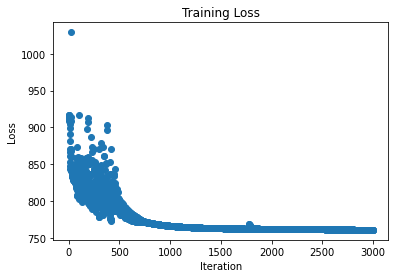

In [279]:
import matplotlib.pyplot as plt
plt.scatter(range(0,3000),train_loss)
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.title('Training Loss')

## 隨機梯度下降(Stochastic Gradient Descent)

In [282]:
import time
a = time.clock()

net = ANN(input_size=4, hidden_size=5, output_size=3)
epochs = 3000
lr = 0.01
batch_size = 30
train_loss = []
for i in range(epochs):
  idx = np.random.choice(iris.data.shape[0], batch_size)
  x_batch = iris.data[idx]
  y_batch = y[idx]

  grad = net.numerical_gradient(x_batch,y_batch)

  for key in ('W1', 'b1', 'W2', 'b2'):
    net.params[key] = net.params[key] - lr * grad[key]
  loss = net.loss(x_batch, y_batch)
  train_loss.append(loss)

time.clock() - a

11.314261000000002

Text(0.5, 1.0, 'Training Loss')

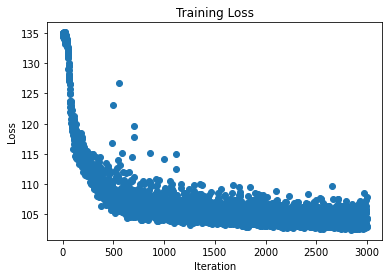

In [283]:
import matplotlib.pyplot as plt
plt.scatter(range(0,3000),train_loss)
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.title('Training Loss')

In [286]:
predicted = np.argmax(net.predict(iris.data), axis = 1)

In [290]:
# accuracy
sum(predicted == iris.target) / len(iris.target)

0.98

In [291]:
from sklearn.metrics import accuracy_score
accuracy_score(iris.target, predicted)

0.98

In [292]:
from sklearn.metrics import confusion_matrix
confusion_matrix(iris.target, predicted)

array([[50,  0,  0],
       [ 0, 47,  3],
       [ 0,  0, 50]])

## 決策邊界

In [293]:
net = ANN(input_size=2, hidden_size=5, output_size=3)

In [294]:
from sklearn.datasets import load_iris
iris = load_iris()
x= iris.data[:,[2,3]]

In [295]:
y = np.zeros((len(iris.target), 3))
for idx, val in enumerate(iris.target):
    y[idx, val] = 1

In [297]:
import time
a = time.clock()

epochs = 3000
lr = 0.01
batch_size = 30
train_loss = []
for i in range(epochs):
  idx = np.random.choice(x.shape[0], batch_size)
  x_batch = x[idx]
  y_batch = y[idx]

  grad = net.numerical_gradient(x_batch,y_batch)

  for key in ('W1', 'b1', 'W2', 'b2'):
    net.params[key] = net.params[key] - lr * grad[key]
  loss = net.loss(x_batch, y_batch)
  train_loss.append(loss)

time.clock() - a

8.658056000000002

In [298]:
x_min, x_max = x[:, 0].min() - 1, x[:, 0].max() + 1
y_min, y_max = x[:, 1].min() - 1, x[:, 1].max() + 1

xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

In [300]:
Z = np.argmax(net.predict(np.c_[xx.ravel(), yy.ravel()]), axis = 1)
Z = Z.reshape(xx.shape)

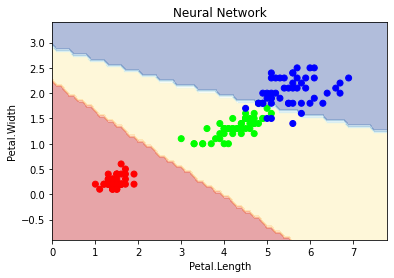

In [301]:
plt.plot()
plt.contourf(xx, yy, Z, alpha=0.4, cmap = plt.cm.RdYlBu)
plt.scatter(x[:, 0], x[:, 1], c=y, cmap = plt.cm.brg)
plt.title('Neural Network')
plt.xlabel('Petal.Length')
plt.ylabel('Petal.Width')
plt.show()